In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import metodos

%matplotlib ipympl
plt.style.use('./figuras.mplstyle')

In [2]:
df = pd.read_csv(rf'Mediciones\Clase 3\dinamico_d60_fs5000(0).csv')

V = df['Tension fotodiodo [V]'].values
tiempo = df['Tiempo [s]'].values
datos_hasta_t = df['Datos hasta tiempo'].values
duracion = df['Duracion [s]'][0]
fs = df['Frecuencia de sampleo [Hz]'][0]


N_puntos = int(duracion*fs)
Deltat = 1/fs

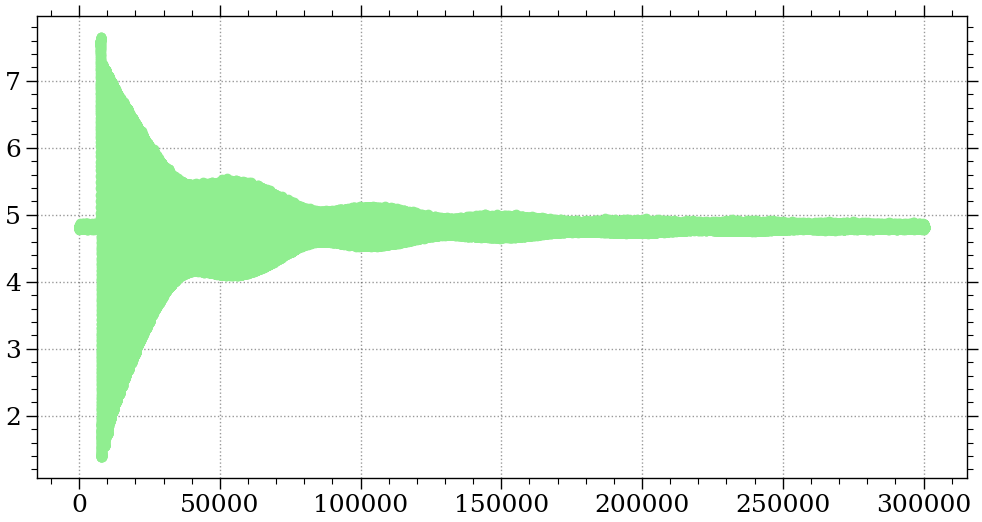

In [3]:
fig, ax = plt.subplots()

ax.plot(V,'o-');

Numero de puntos = 300000 Longitud de Valores = 300377
[324 323 353 322 324 352 323 325 341 330 326 336 333 327 331 339 324 332
 337 324 331 341 328 327 337 331 325 331 333 330 332 338 330 325 337 330
 328 331 334 332 331 328 332 332 332 327 333 332 331 335 325 336 328 333
 332 326 331 333 332 326 332 329 336 329 325 337 324 334 330 327 336 331
 329 328 330 331 332 335 328 320 331 331 335 332 318 337 331 325 337 320
 339 322 334 325 338 324 331]


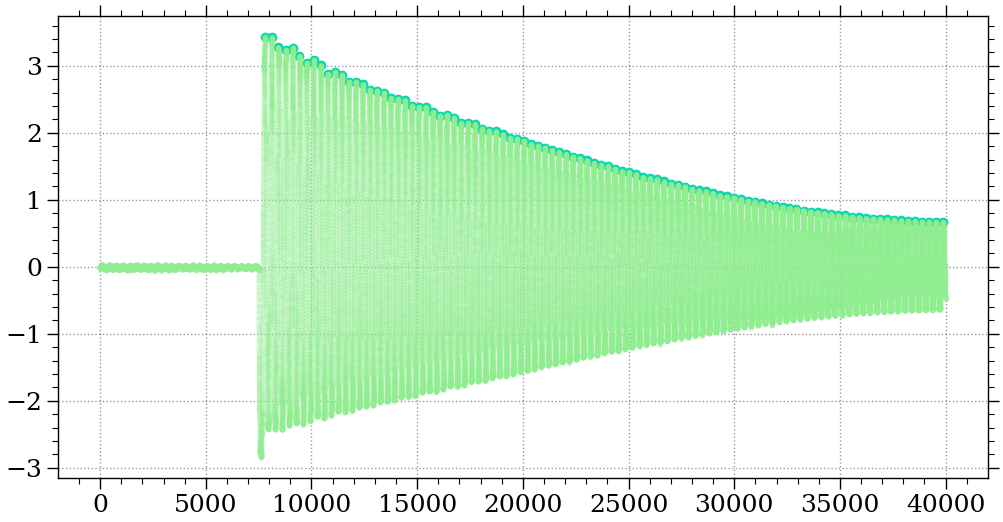

In [4]:
fig, ax = plt.subplots()
cutoff = 40000 #Dado que la curva no es monotona decreciente, agarro la primer parte que muestra el comportamiento exponencial
V_trimmed = V - np.mean(V) #Le resto la media para que cuando de vuelta la funcion quede positiva
V_trimmed = V_trimmed[:cutoff] 
print(f'Numero de puntos = {N_puntos}',f'Longitud de Valores = {len(V)}')
x = np.arange(0,cutoff)
peaks = find_peaks(-V_trimmed,height = [0,3.5],distance = 280,prominence = 1)[0]
ax.plot(x,-V_trimmed,'.-',alpha = 0.25) #Grafico la función dada vuelta porque los datos de abajo están mejor al ppio
ax.scatter(x[peaks],-V_trimmed[peaks],color = 'C5')
print(np.diff(x[peaks]))

alpha = 0.228


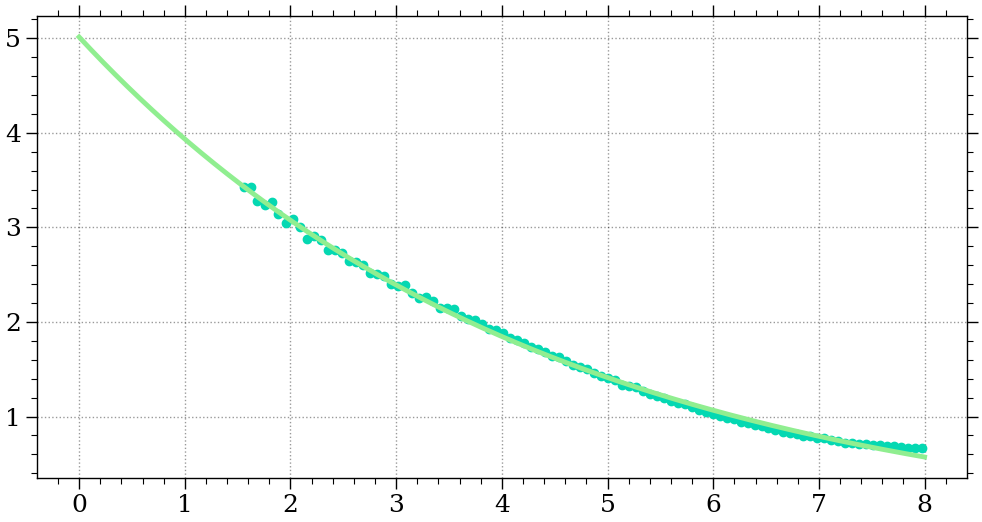

In [5]:
from scipy.optimize import curve_fit

ajuste = lambda t,t0,b,alpha: b + np.exp(-alpha*(t-t0))

t = x/fs

popt, pcov = curve_fit(ajuste,t[peaks],-V_trimmed[peaks])

fig, ax = plt.subplots()

ax.plot(t,ajuste(t,*popt))
ax.scatter(t[peaks],-V_trimmed[peaks],color = 'C5')
print(f'alpha = {popt[2]:.3f}')

In [20]:
w1 = 2*np.pi*15.2
k1 = 1.875/0.395
k2 = 4.694/0.395
k3 = 7.855/0.395
alpha = popt[2]
gamma = (w1**2 + alpha**2)/(k1**4)
print(gamma)
w2 = np.sqrt(gamma*k2**4 - alpha**2)
w3 = np.sqrt(gamma*k3**4 - alpha**2)
print(f'f2 = {w2/(2*np.pi):.3f} y f3 = {w3/(2*np.pi):.3f}')

diameter = 0.0051 #5.1 mm
I = ((np.pi)*diameter**4)/64
densidad_lineal = 0.0829345/0.395 #kg/m
beta = I/densidad_lineal
young = (w2**2 + alpha**2)/(beta*k2**4)
print(f'Young = {young/1e9:.3f} GPa')

17.96522549549116
f2 = 95.264 y f3 = 266.769
Young = 113.585 GPa


In [35]:
w2 = 2*np.pi*95.55
w3 = 2*np.pi*268.96

w = [w1,w2,w3]
k = [k1,k2,k3]
young = []
for i in range(3):
    young.append((w[i]**2 + alpha**2)/(beta*k[i]**4)/1e9)

# fig, ax = plt.subplots(figsize = [5,3])

# ax.scatter([1,2,3],young);

print(f'{np.average(young):.3f} GPa')

114.437 GPa
